**Parkinson Diagnosis Classifier**

The dataset for this model comes from UC Irvine's Machine Learning Repository.

[Parkinson Dataset with replicated acoustic features Data Set](http://archive.ics.uci.edu/ml/datasets/Parkinson+Dataset+with+replicated+acoustic+features+#)

****Get Data****

In [2]:
# The code was removed by Watson Studio for sharing.

In [3]:
print('Project Name: {0}'.format(project.get_name()))
print('Project Description: {0}'.format(project.get_description()))
print('Project Bucket Name: {0}'.format(project.get_project_bucket_name()))
print('Project Assets (Connections): {0}'.format(project.get_assets(asset_type='connection')))

Project Name: Warriors-Test-02
Project Description: This is a test project for Watson&#x27;s Warriors.
Project Bucket Name: warriorstest02-donotdelete-pr-tkx3ftetaseqtk
Project Assets (Connections): []


In [4]:
# The code was removed by Watson Studio for sharing.

,ID,Recording,Status,Gender,Jitter_rel,Jitter_abs,Jitter_RAP,Jitter_PPQ,Shim_loc,Shim_dB,...,Delta3,Delta4,Delta5,Delta6,Delta7,Delta8,Delta9,Delta10,Delta11,Delta12
0,CONT-01,1,0,1,0.25546,0.000015,0.001467,0.001673,0.030256,0.26313,...,1.407701,1.417218,1.380352,1.420670,1.451240,1.440295,1.403678,1.405495,1.416705,1.354610
1,CONT-01,2,0,1,0.36964,0.000022,0.001932,0.002245,0.023146,0.20217,...,1.331232,1.227338,1.213377,1.352739,1.354242,1.365692,1.322870,1.314549,1.318999,1.323508
2,CONT-01,3,0,1,0.23514,0.000013,0.001353,0.001546,0.019338,0.16710,...,1.412304,1.324674,1.276088,1.429634,1.455996,1.368882,1.438053,1.388910,1.305469,1.305402
3,CONT-02,1,0,0,0.29320,0.000017,0.001105,0.001444,0.024716,0.20892,...,1.501200,1.534170,1.323993,1.496442,1.472926,1.643177,1.551286,1.638346,1.604008,1.621456
4,CONT-02,2,0,0,0.23075,0.000015,0.001073,0.001404,0.013119,0.11607,...,1.508468,1.334511,1.610694,1.685021,1.417614,1.574895,1.640088,1.533666,1.297536,1.382023


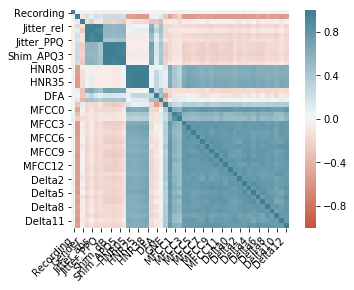

In [5]:
import seaborn as sns

corr = df_data_1.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [7]:
y = df_data_1.Status
x = df_data_1.drop(['Status', 'ID'],axis=1)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
x_train.head()

,Recording,Gender,Jitter_rel,Jitter_abs,Jitter_RAP,Jitter_PPQ,Shim_loc,Shim_dB,Shim_APQ3,Shim_APQ5,...,Delta3,Delta4,Delta5,Delta6,Delta7,Delta8,Delta9,Delta10,Delta11,Delta12
75,1,1,0.21196,0.000012,0.001276,0.001557,0.027919,0.23795,0.014838,0.019850,...,1.406110,1.332362,1.336940,1.392848,1.403844,1.361599,1.383108,1.479876,1.547311,1.292349
215,3,1,0.68371,0.000038,0.004264,0.003810,0.031605,0.27507,0.017943,0.021056,...,0.931288,0.958077,0.972559,0.974807,0.901464,0.939198,0.939558,0.941699,0.955907,0.978104
90,1,1,0.64068,0.000046,0.003532,0.003278,0.025302,0.22205,0.013866,0.014489,...,1.641386,1.658016,1.522777,1.582965,1.637210,1.646390,1.434436,1.307710,1.690917,1.392329
230,3,1,1.17830,0.000070,0.007112,0.006334,0.149110,1.37560,0.093485,0.077903,...,1.262602,1.267017,1.255716,1.252483,1.275054,1.314755,1.372089,1.355118,1.337585,1.391346
201,1,0,1.25410,0.000092,0.006786,0.007702,0.058502,0.52835,0.032762,0.038839,...,0.848540,0.950254,0.855229,0.914237,0.955616,0.880020,1.008293,0.854644,0.900393,0.891114


In [9]:
from sklearn.linear_model import LogisticRegression

# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

logisticRegr.fit(x_train, y_train)

# Returns a NumPy Array
# Predict for One Observation
#logisticRegr.predict(x_test[0].reshape(1,-1))

#logisticRegr.predict(x_test[0:10])

predictions = logisticRegr.predict(x_test)

# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [10]:
print(score)

0.8333333333333334
